In [1]:
import glob
import scipy.io
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
% matplotlib inline

In [15]:
def plot1(full, ice, rf, none, ax):
    ax.grid()
    ax.plot(full, lw=3, label='FULL')
    ax.plot(rf, '--', lw=3, label='RF')
    ax.plot(ice, '--', lw=3, label='ICE')
    ax.plot(none, '--', lw=3, label='NONE')
    ax.set_xticks(np.arange(1, 41, 2))
    
def plot2(full, rf, ice, none, ax):
    ax.grid()
    ax.plot(full-none, lw=3, label='FULL - NONE')
    ax.plot(rf-none, '--', lw=3, label='ICE - NONE')
    ax.plot(ice-none, '--', lw=3, label='RF - NONE')
    ax.set_xticks(np.arange(1, 41, 2))
    
def plot3(IO, AO, RF, DIL, ax):
    ax.plot(IO, lw=2, label='Ice=>Ocean')
    ax.plot(AO, lw=2, label='Atmos=>Ocean')
    ax.plot(RF, lw=2, label='Runoff')
    ax.plot(DIL, lw=2, label='Dilution flux')
    ax.set_xticks(np.arange(1, 41, 2))

In [23]:
TEST01 = nc.Dataset('_data\TEST01_1m_19920711_19960819_ptrc_T.nc')
NORF01 = nc.Dataset('_data\NORF01_1m_19920711_19951212_ptrc_T.nc')
NOICE01 = nc.Dataset('_data\NOICE01_1m_19920711_19951212_ptrc_T.nc')
NONE01 = nc.Dataset('_data\NONE01_1m_19920711_19951212_ptrc_T.nc')

Ba1=TEST01.variables['Ba'][:]
Ba2=NORF01.variables['Ba'][:]
Ba3=NOICE01.variables['Ba'][:]
Ba4=NONE01.variables['Ba'][:]

d18O1=TEST01.variables['d18O'][:]
d18O2=NORF01.variables['d18O'][:]
d18O3=NOICE01.variables['d18O'][:]
d18O4=NONE01.variables['d18O'][:]

nav_lat=TEST01.variables['nav_lat'][:]
nav_lon=TEST01.variables['nav_lon'][:]

# Locations

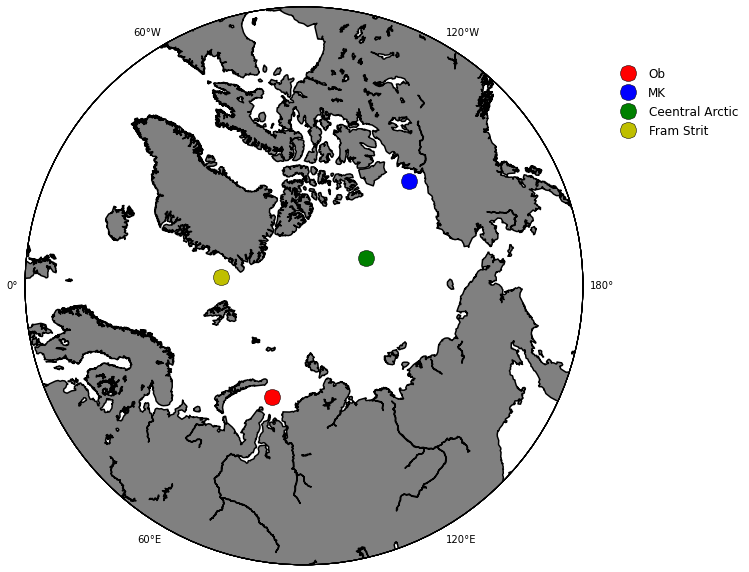

In [24]:
fig=plt.figure(figsize=(10, 10)); ax=plt.gca()
proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=90, round=True, ax=ax)
proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
proj.drawcoastlines(linewidth=1.5, color='k')
x1, y1 = proj(nav_lon[145, -32], nav_lat[145, -32])
x2, y2 = proj(nav_lon[131, 67], nav_lat[131, 67])
x3, y3 = proj(nav_lon[138, 55], nav_lat[138, 55])
x4, y4 = proj(nav_lon[135, -48], nav_lat[135, -48])
proj.plot(x1, y1, 'ro', ms=16, label='Ob')
proj.plot(x2, y2, 'bo', ms=16, label='MK')
proj.plot(x3, y3, 'go', ms=16, label='Ceentral Arctic')
proj.plot(x4, y4, 'yo', ms=16, label='Fram Strit')
LG = ax.legend(numpoints=1, bbox_to_anchor=(1.05, 0.9), loc=2, borderaxespad=0.); LG.draw_frame(False)

# Ba

In [25]:
OB1 = Ba1[:41, 0, 145, -32]; OB2 = Ba2[:, 0, 145, -32]; OB3 = Ba3[:, 0, 145, -32]; OB4 = Ba4[:, 0, 145, -32]
MK1 = Ba1[:41, 0, 131, 67];  MK2 = Ba2[:, 0, 131, 67];  MK3 = Ba3[:, 0, 131, 67];  MK4 = Ba4[:, 0, 131, 67]
CA1 = Ba1[:41, 0, 138, 55];  CA2 = Ba2[:, 0, 138, 55];  CA3 = Ba3[:, 0, 138, 55];  CA4 = Ba4[:, 0, 138, 55]
FR1 = Ba1[:41, 0, 135, -48]; FR2 = Ba2[:, 0, 135, -48]; FR3 = Ba3[:, 0, 135, -48]; FR4 = Ba4[:, 0, 135, -48]

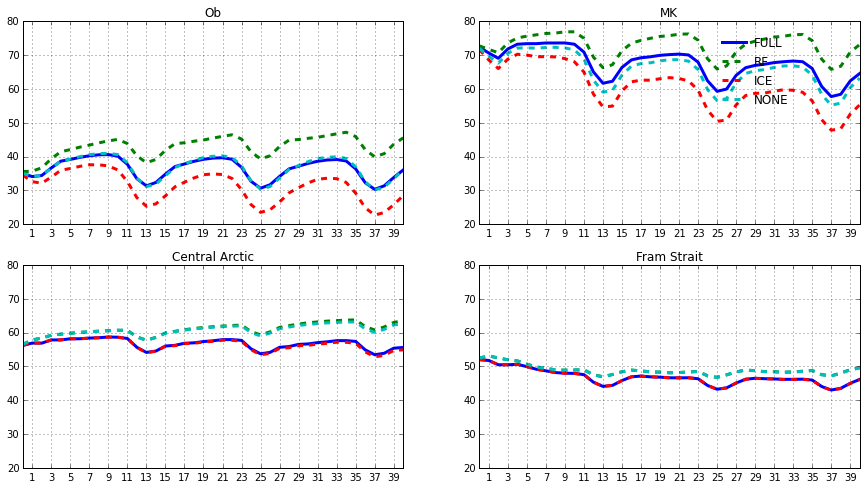

In [26]:
fig = plt.figure(figsize=(15, 8))
ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((2, 2), (0, 1), colspan=1, rowspan=1)
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=1, rowspan=1)
ax4 = plt.subplot2grid((2, 2), (1, 1), colspan=1, rowspan=1)
plot1(OB1, OB2, OB3, OB4, ax1); ax1.set_title('Ob')
plot1(MK1, MK2, MK3, MK4, ax2); ax2.set_title('MK')
plot1(CA1, CA2, CA3, CA4, ax3); ax3.set_title('Central Arctic')
plot1(FR1, FR2, FR3, FR4, ax4); ax4.set_title('Fram Strait')
ax1.set_ylim([20, 80]); ax2.set_ylim([20, 80]); 
ax3.set_ylim([20, 80]); ax4.set_ylim([20, 80])
LG = ax2.legend(numpoints=1, bbox_to_anchor=(0.625, 0.95), loc=2, borderaxespad=0.); LG.draw_frame(False)

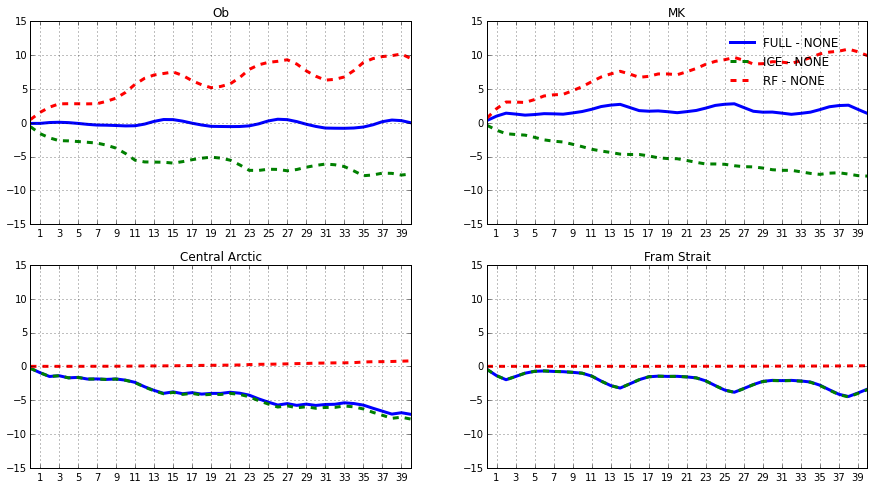

In [27]:
fig = plt.figure(figsize=(15, 8))
ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((2, 2), (0, 1), colspan=1, rowspan=1)
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=1, rowspan=1)
ax4 = plt.subplot2grid((2, 2), (1, 1), colspan=1, rowspan=1)
plot2(OB1, OB2, OB3, OB4, ax1); ax1.set_title('Ob')
plot2(MK1, MK2, MK3, MK4, ax2); ax2.set_title('MK')
plot2(CA1, CA2, CA3, CA4, ax3); ax3.set_title('Central Arctic')
plot2(FR1, FR2, FR3, FR4, ax4); ax4.set_title('Fram Strait')
ax1.set_ylim([-15, 15]); ax2.set_ylim([-15, 15])
ax3.set_ylim([-15, 15]); ax4.set_ylim([-15, 15])
LG = ax2.legend(numpoints=1, bbox_to_anchor=(0.625, 0.95), loc=2, borderaxespad=0.); LG.draw_frame(False)

# $\mathsf{\delta^{18}O}$

In [28]:
OB1 = d18O1[:41, 0, 145, -32]; OB2 = d18O2[:, 0, 145, -32]; OB3 = d18O3[:, 0, 145, -32]; OB4 = d18O4[:, 0, 145, -32]
MK1 = d18O1[:41, 0, 131, 67];  MK2 = d18O2[:, 0, 131, 67];  MK3 = d18O3[:, 0, 131, 67];  MK4 = d18O4[:, 0, 131, 67]
CA1 = d18O1[:41, 0, 138, 55];  CA2 = d18O2[:, 0, 138, 55];  CA3 = d18O3[:, 0, 138, 55];  CA4 = d18O4[:, 0, 138, 55]
FR1 = d18O1[:41, 0, 135, -48]; FR2 = d18O2[:, 0, 135, -48]; FR3 = d18O3[:, 0, 135, -48]; FR4 = d18O4[:, 0, 135, -48]

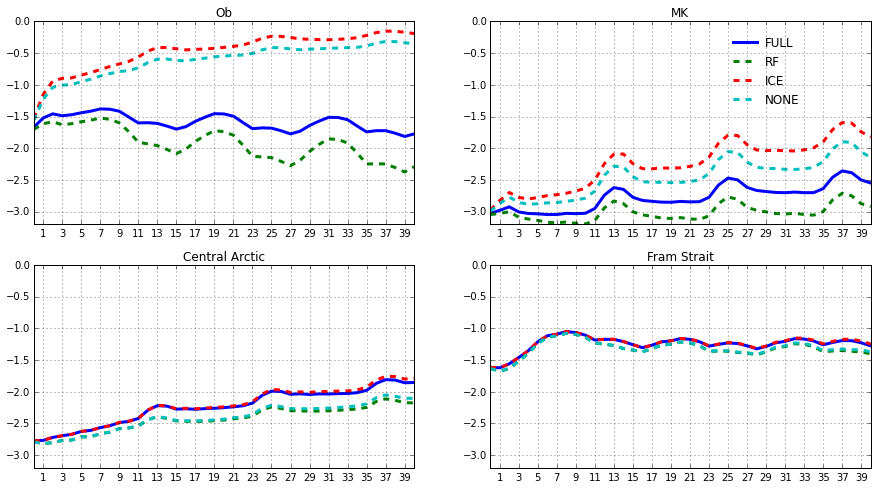

In [29]:
fig = plt.figure(figsize=(15, 8))
ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((2, 2), (0, 1), colspan=1, rowspan=1)
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=1, rowspan=1)
ax4 = plt.subplot2grid((2, 2), (1, 1), colspan=1, rowspan=1)
plot1(OB1, OB2, OB3, OB4, ax1); ax1.set_title('Ob')
plot1(MK1, MK2, MK3, MK4, ax2); ax2.set_title('MK')
plot1(CA1, CA2, CA3, CA4, ax3); ax3.set_title('Central Arctic')
plot1(FR1, FR2, FR3, FR4, ax4); ax4.set_title('Fram Strait')
ax1.set_ylim([-3.2, 0]); ax2.set_ylim([-3.2, 0])
ax3.set_ylim([-3.2, 0]); ax4.set_ylim([-3.2, 0])
LG = ax2.legend(numpoints=1, bbox_to_anchor=(0.625, 0.95), loc=2, borderaxespad=0.); LG.draw_frame(False)

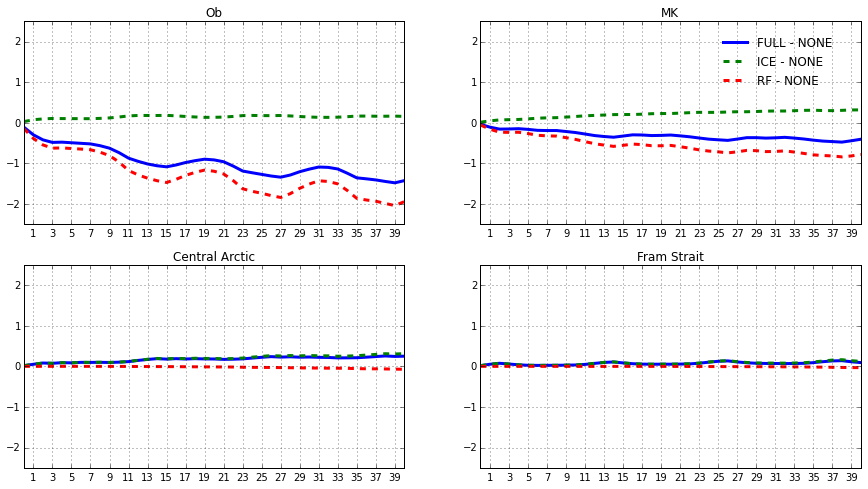

In [30]:
fig = plt.figure(figsize=(15, 8))
ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((2, 2), (0, 1), colspan=1, rowspan=1)
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=1, rowspan=1)
ax4 = plt.subplot2grid((2, 2), (1, 1), colspan=1, rowspan=1)
plot2(OB1, OB2, OB3, OB4, ax1); ax1.set_title('Ob')
plot2(MK1, MK2, MK3, MK4, ax2); ax2.set_title('MK')
plot2(CA1, CA2, CA3, CA4, ax3); ax3.set_title('Central Arctic')
plot2(FR1, FR2, FR3, FR4, ax4); ax4.set_title('Fram Strait')
ax1.set_ylim([-2.5, 2.5]); ax2.set_ylim([-2.5, 2.5])
ax3.set_ylim([-2.5, 2.5]); ax4.set_ylim([-2.5, 2.5])
LG = ax2.legend(numpoints=1, bbox_to_anchor=(0.625, 0.95), loc=2, borderaxespad=0.); LG.draw_frame(False)

# Forcings

In [31]:
name=glob.glob('_data/NEMO/INPUT_DYNA/*')
NC = nc.Dataset(name[0]) 
IO= NC.variables['iowaflup']
AO = NC.variables['sowaflep']
S = NC.variables['vosaline']
T = NC.variables['votemper']
RF = NC.variables['sorunoff']
DIL = NC.variables['sowaflcd']

IO1=IO[0:41, 145, -32]; IO2=IO[0:41, 131, 67]; IO3=IO[0:41, 138, 55]; IO4=IO[0:41, 135, -48]
AO1=AO[0:41, 145, -32]; AO2=AO[0:41, 131, 67]; AO3=AO[0:41, 138, 55]; AO4=AO[0:41, 135, -48]
RF1=RF[0:41, 145, -32]; RF2=RF[0:41, 131, 67]; RF3=RF[0:41, 138, 55]; RF4=RF[0:41, 135, -48]
DIL1=DIL[0:41, 145, -32]; DIL2=DIL[0:41, 131, 67]; DIL3=DIL[0:41, 138, 55]; DIL4=DIL[0:41, 135, -48]
T1=T[0:41, 0, 145, -32]; T2=T[0:41, 0, 131, 67]; T3=T[0:41, 0, 138, 55]; T4=T[0:41, 0, 135, -48]
S1=S[0:41, 0, 145, -32]; S2=S[0:41, 0, 131, 67]; S3=S[0:41, 0, 138, 55]; S4=S[0:41, 0, 135, -48]

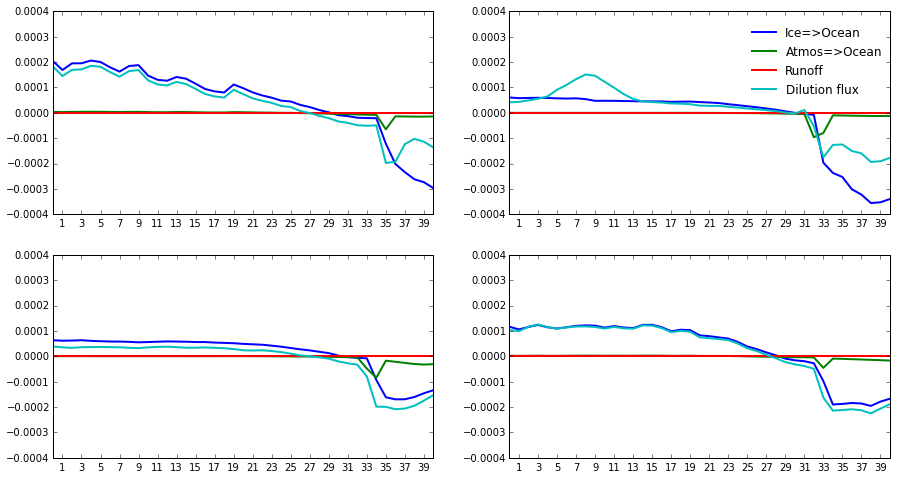

In [32]:
fig = plt.figure(figsize=(15, 8))
ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((2, 2), (0, 1), colspan=1, rowspan=1)
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=1, rowspan=1)
ax4 = plt.subplot2grid((2, 2), (1, 1), colspan=1, rowspan=1)
plot3(IO1, AO1, RF1, DIL1, ax1)
plot3(IO2, AO2, RF2, DIL2, ax2)
plot3(IO3, AO3, RF3, DIL3, ax3)
plot3(IO4, AO4, RF4, DIL4, ax4)
ax1.set_ylim([-4e-4, 4e-4]); ax2.set_ylim([-4e-4, 4e-4])
ax3.set_ylim([-4e-4, 4e-4]); ax4.set_ylim([-4e-4, 4e-4])
LG = ax2.legend(numpoints=1, bbox_to_anchor=(0.625, 0.95), loc=2, borderaxespad=0.); LG.draw_frame(False)